<a href="https://colab.research.google.com/github/Harshini-selvaraj/predictive_analysis/blob/main/predictive_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Loading the Iris Dataset ---

Features (X) head:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Target (y) head:
0    0
1    0
2    0
3    0
4    0
dtype: int64

Dataset shape: Features (150, 4) Target (150,)

Target names (classes): ['setosa' 'versicolor' 'virginica']

--- Exploratory Data Analysis (EDA) ---

Descriptive statistics for features:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866

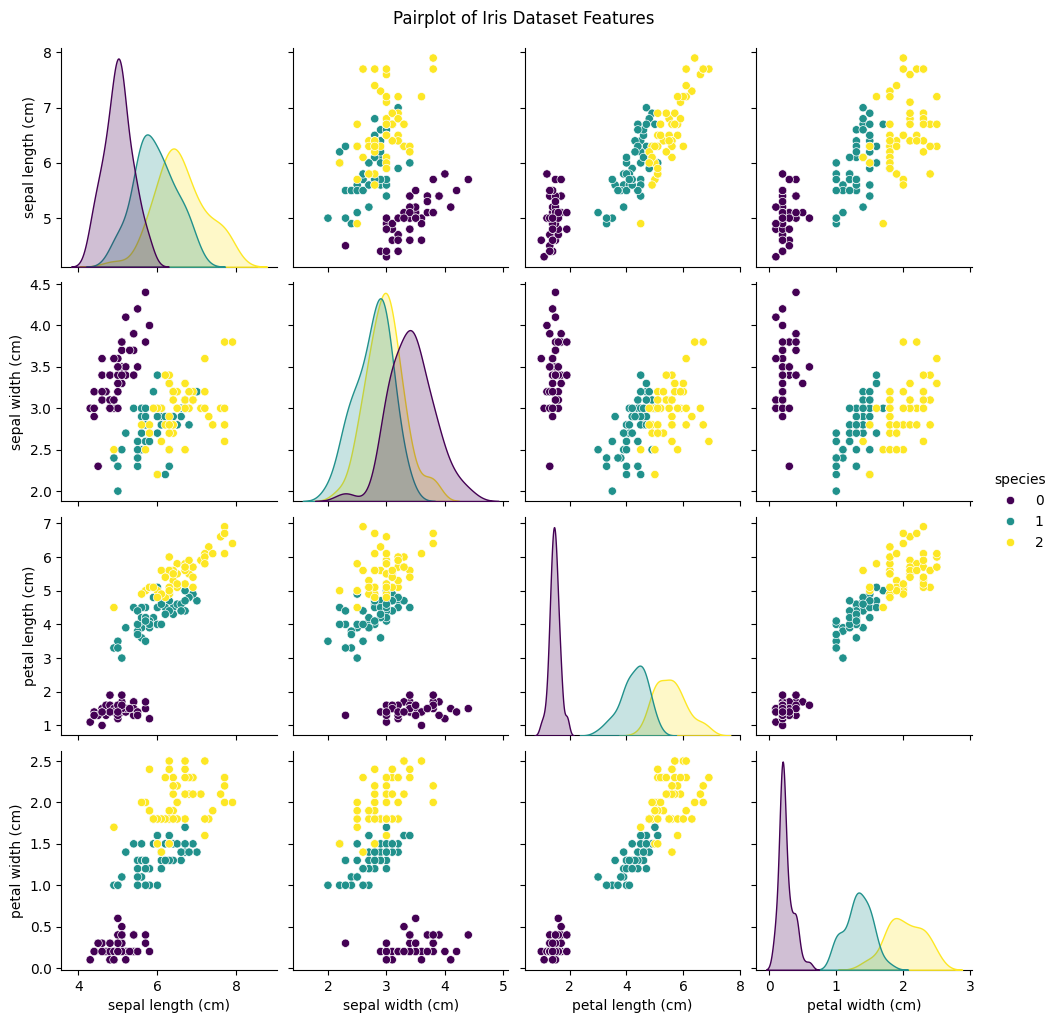

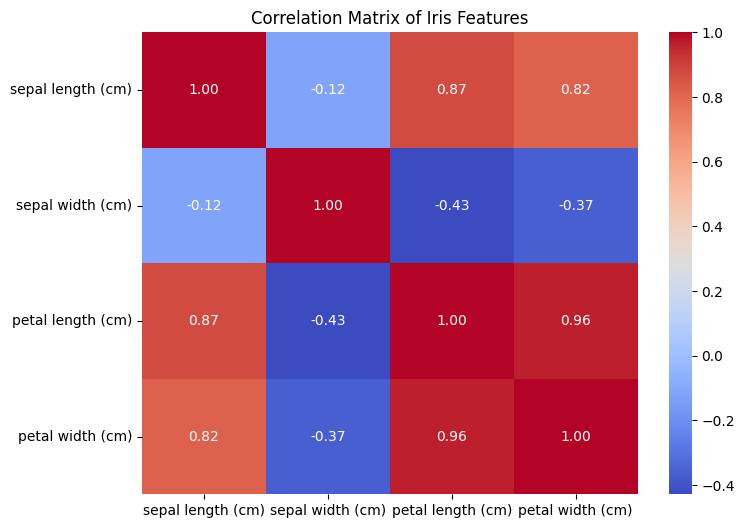

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load Dataset ---
# For this demonstration, we'll use the famous Iris dataset,
# which is a classic for classification tasks.
# It contains 4 features (sepal length, sepal width, petal length, petal width)
# and 3 classes of iris flowers (Setosa, Versicolor, Virginica).

print("--- Loading the Iris Dataset ---")
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

print("\nFeatures (X) head:")
print(X.head())
print("\nTarget (y) head:")
print(y.head())
print("\nDataset shape: Features {} Target {}".format(X.shape, y.shape))
print("\nTarget names (classes):", iris.target_names)


# --- 2. Exploratory Data Analysis (EDA) ---
# A brief look at the data distribution and relationships.
# This step helps understand the data before model building.

print("\n--- Exploratory Data Analysis (EDA) ---")
print("\nDescriptive statistics for features:")
print(X.describe())

print("\nValue counts for target variable:")
print(y.value_counts()) # Shows how many samples are in each class

# Pairplot to visualize relationships between features and target classes
# This will generate a plot showing scatter plots for all feature pairs
# and histograms for individual features, colored by target class.
# Note: This plot will open in a new window if run locally.
# In a typical notebook environment (like Jupyter), it would be displayed inline.
print("\nGenerating pairplot (may take a moment and open a new window if run locally)...")
sns.pairplot(X.join(pd.DataFrame(y, columns=['species'])), hue='species', palette='viridis')
plt.suptitle('Pairplot of Iris Dataset Features', y=1.02) # Adjust title position
# plt.show() # Uncomment to display plot if running in an environment that supports it

# You can also visualize correlations (though less critical for Iris due to clear separation)
plt.figure(figsize=(8, 6))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Iris Features')
# plt.show() # Uncomment to display plot


# --- 3. Feature Selection (Simple Example) ---
# For the Iris dataset, all features are generally relevant.
# However, for larger datasets, feature selection is crucial.
# Here, we'll demonstrate a simple approach: selecting all features for our model.
# In a more complex scenario, you might use:
#   - Variance Thresholding
#   - SelectKBest (based on statistical tests)
#   - Feature importance from tree-based models (e.g., RandomForestClassifier)
#   - Recursive Feature Elimination (RFE)

print("\n--- Feature Selection ---")
# In this case, we will use all available features as they are all relevant for Iris.
selected_features = X.columns.tolist()
X_selected = X[selected_features]
print(f"Selected features: {selected_features}")
print("Using all features for the model.")


# --- 4. Data Splitting ---
# Split the dataset into training and testing sets.
# The training set is used to train the model, and the testing set is used
# to evaluate its performance on unseen data.
# A common split is 70-80% for training and 20-30% for testing.
# `stratify=y` ensures that the proportion of target classes is the same
# in both training and testing sets, which is important for imbalanced datasets.

print("\n--- Data Splitting ---")
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.25, random_state=42, stratify=y
)

print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")


# --- 5. Model Training ---
# We'll use Logistic Regression, a simple yet powerful linear model
# for classification, especially effective for well-separated classes like Iris.

print("\n--- Model Training ---")
model = LogisticRegression(max_iter=200, random_state=42) # Increased max_iter for convergence
print(f"Training {type(model).__name__} model...")
model.fit(X_train, y_train)
print("Model training complete.")


# --- 6. Model Evaluation ---
# Evaluate the trained model's performance on the unseen test data.
# We'll use accuracy score and a classification report which provides
# precision, recall, f1-score for each class.

print("\n--- Model Evaluation ---")
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy Score: {accuracy:.4f}")

print("\nClassification Report:")
# The target_names argument makes the report more readable by showing class names
print(classification_report(y_test, y_pred, target_names=iris.target_names))

print("\n--- Model Demonstration Complete ---")
print("This notebook demonstrates the basic steps from data loading to model evaluation.")
print("For more complex datasets, further steps like data preprocessing (scaling, encoding),")
print("hyperparameter tuning, and more advanced feature engineering would be essential.")
